## Creating the Import Script

In [20]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class FlareVSNoFlare():
    IMG_SIZE = 80
    FLARE = './dataset/flare'
    NO_FLARE = './dataset/no_flare'
    LABELS = {NO_FLARE: 0, FLARE: 1}
    training_data = []
    flarecount = 0
    no_flarecount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for file in tqdm(os.listdir(label), position=0, leave=True):
                if '.jpg' in file:
                    try:
                        path = os.path.join(label, file)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) # squish them together to be the size of IMG_SIZE*IMG_SIZE px.
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) # add hotvectorarray

                        if label == self.FLARE:
                            self.flarecount += 1
                        elif label == self.NO_FLARE:
                            self.no_flarecount += 1
                    except Exception as e:
                        #print(str(e))
                        pass
                
            np.random.shuffle(self.training_data)
            np.save('training_data.npy', self.training_data)
            print('Flare:', self.flarecount)
            print('No Flare:', self.no_flarecount)
            
if REBUILD_DATA:
    flarevsnoflare = FlareVSNoFlare
    flarevsnoflare.make_training_data(flarevsnoflare)

 36%|███▋      | 248/683 [00:00<00:00, 2477.51it/s]

./dataset/no_flare


 38%|███▊      | 262/682 [00:00<00:00, 2617.86it/s]

Flare: 0
No Flare: 682
./dataset/flare


100%|██████████| 682/682 [00:00<00:00, 2484.49it/s]


Flare: 682
No Flare: 682


In [21]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [22]:
print(len(training_data))

1364


In [23]:
print(training_data[0])

[array([[125, 127, 128, ..., 125, 133, 123],
       [126, 128, 123, ..., 126, 117, 124],
       [126, 124, 125, ..., 124, 119, 124],
       ...,
       [127, 127, 127, ..., 128, 126, 124],
       [127, 129, 129, ..., 122, 128, 133],
       [123, 125, 128, ..., 128, 130, 128]], dtype=uint8)
 array([0., 1.])]


 0


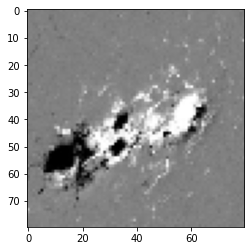

classification: [0. 1.]


In [24]:
import matplotlib.pyplot as plt

i = int(input())

plt.imshow(training_data[i][0], cmap='gray')
plt.show()

print('classification:', str(training_data[i][1]))

### Could convert it to a tensor first

In [26]:
import torch

IMG_SIZE = 80

X = torch.Tensor([i[0] for i in training_data]).view(-1,IMG_SIZE,IMG_SIZE)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

print(len(X))
print(len(y))

1364
1364


tensor([[0.4902, 0.4980, 0.5020,  ..., 0.4902, 0.5216, 0.4824],
        [0.4941, 0.5020, 0.4824,  ..., 0.4941, 0.4588, 0.4863],
        [0.4941, 0.4863, 0.4902,  ..., 0.4863, 0.4667, 0.4863],
        ...,
        [0.4980, 0.4980, 0.4980,  ..., 0.5020, 0.4941, 0.4863],
        [0.4980, 0.5059, 0.5059,  ..., 0.4784, 0.5020, 0.5216],
        [0.4824, 0.4902, 0.5020,  ..., 0.5020, 0.5098, 0.5020]])


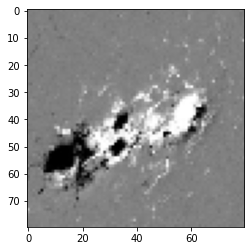

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")
print(X[0])